In [1]:
suppressMessages(library(topGO))
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(cowplot))
suppressMessages(library(ggpubr))
library(ComplexHeatmap)
library(RColorBrewer)
library(circlize)
library(extrafont)

#enrichment_fun = colorRamp2(c(0, 5, 10, 15, 20), c("blue", "white", "red"))
enrichment_fun <- colorRamp2(c(0, 5, 10, 15, 20), brewer.pal(5, "Greens"))
log10p_fun <- colorRamp2(c(1, 2, 3, 4, 5, 10, 15, 20, 25), brewer.pal(9, "Reds"))

#col_fun(0)

Loading required package: grid

Attaching package: ‘grid’

The following object is masked from ‘package:topGO’:

    depth

ComplexHeatmap version 2.0.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.8
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.


Attaching package: ‘circlize’

The following object is masked from ‘package:graph’:

    degree

Registering fonts with R


In [2]:
#font_import(paths = "~/.local/share")


In [3]:
loadfonts(quiet=TRUE)

In [4]:
fonttable()


package,afmfile,fontfile,FullName,FamilyName,FontName,Bold,Italic,Symbol,afmsymfile
<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
NA,DejaVuSans.afm.gz,/usr/share/fonts/dejavu/DejaVuSans.ttf,DejaVu Sans,DejaVu Sans,DejaVuSans,FALSE,FALSE,FALSE,NA
NA,DejaVuSans-Bold.afm.gz,/usr/share/fonts/dejavu/DejaVuSans-Bold.ttf,DejaVu Sans Bold,DejaVu Sans,DejaVuSans-Bold,TRUE,FALSE,FALSE,NA
NA,DejaVuSans-BoldOblique.afm.gz,/usr/share/fonts/dejavu/DejaVuSans-BoldOblique.ttf,DejaVu Sans Bold Oblique,DejaVu Sans,DejaVuSans-BoldOblique,TRUE,TRUE,FALSE,NA
NA,DejaVuSans-ExtraLight.afm.gz,/usr/share/fonts/dejavu/DejaVuSans-ExtraLight.ttf,DejaVu Sans ExtraLight,DejaVu Sans Light,DejaVuSans-ExtraLight,FALSE,FALSE,FALSE,NA
NA,DejaVuSans-Oblique.afm.gz,/usr/share/fonts/dejavu/DejaVuSans-Oblique.ttf,DejaVu Sans Oblique,DejaVu Sans,DejaVuSans-Oblique,FALSE,TRUE,FALSE,NA
NA,DejaVuSansCondensed.afm.gz,/usr/share/fonts/dejavu/DejaVuSansCondensed.ttf,DejaVu Sans Condensed,DejaVu Sans Condensed,DejaVuSansCondensed,FALSE,FALSE,FALSE,NA
NA,DejaVuSansCondensed-Bold.afm.gz,/usr/share/fonts/dejavu/DejaVuSansCondensed-Bold.ttf,DejaVu Sans Condensed Bold,DejaVu Sans Condensed,DejaVuSansCondensed-Bold,TRUE,FALSE,FALSE,NA
NA,DejaVuSansCondensed-BoldOblique.afm.gz,/usr/share/fonts/dejavu/DejaVuSansCondensed-BoldOblique.ttf,DejaVu Sans Condensed Bold Oblique,DejaVu Sans Condensed,DejaVuSansCondensed-BoldOblique,TRUE,TRUE,FALSE,NA
NA,DejaVuSansCondensed-Oblique.afm.gz,/usr/share/fonts/dejavu/DejaVuSansCondensed-Oblique.ttf,DejaVu Sans Condensed Oblique,DejaVu Sans Condensed,DejaVuSansCondensed-Oblique,FALSE,TRUE,FALSE,NA


In [5]:
drawHeatmap <- function(figX){
    rownames.figX <- figX$term
    figX<- as.matrix(figX[, c("fold_enrichment", "upload_1 (FDR)", "log10p")])
    rownames(figX) <- rownames.figX
    
    df <- data.frame(list(log10pvalue=figX[, c("log10p")], 
                          enrichment=figX[, c("fold_enrichment")]))
    
    ha <- Heatmap(figX, 
                  cluster_rows=F, 
                  cluster_columns=F, 
                  show_heatmap_legend = F, 
                  row_names_max_width = unit(15, "cm"),
                  row_names_side = "left",
                  rect_gp =  gpar(type = "none"),  
                  width = unit(0, "cm"),
                  height = unit(8, "cm"),
                  row_title_gp = gpar(fontsize = 11, font=2),
                  row_names_gp = gpar(fontsize = 11, font=2),
                  column_labels=c("", "", ""))

    ht <- rowAnnotation(df=df, 
                        gp = gpar(col = "black", lwd = 1, fontsize=12, font=2),
                        col=list(log10pvalue=log10p_fun, enrichment=enrichment_fun))
    return (ha+ht)
    
}

In [6]:
fig1A <- fread('../data/data_for_figures//Figure1A_transcription_downregulated_geneontology.tsv')
colnames(fig1A) <- c("term", "fold_enrichment", "upload_1 (FDR)")
fig1A$log10p = -log10(fig1A[, 'upload_1 (FDR)'])
fig1A


pdf("../Figures/Figure1/Figure1A.pdf", family="ArialMT")
drawHeatmap(fig1A)
dev.off()

term,fold_enrichment,upload_1 (FDR),log10p
<chr>,<dbl>,<dbl>,<dbl>
CENP-A containing chromatin organization (GO:0061641),20.94,1.84e-15,14.735182
chromatin remodeling at centromere (GO:0031055),20.65,4.51e-16,15.345823
chromosome organization (GO:0051276),4.79,1.28e-52,51.892790
DNA strand elongation (GO:0022616),17.08,6.50e-07,6.187087
interstrand cross-link repair (GO:0036297),8.74,7.12e-07,6.147520
signal transduction in response to DNA damage (GO:0042770),4.94,4.93e-05,4.307153
DNA synthesis involved in DNA repair (GO:0000731),8.11,4.61e-06,5.336299
postreplication repair (GO:0006301),7.35,3.34e-05,4.476254
chromosome segregation (GO:0007059),8.73,1.34e-36,35.872895


png 
  2

In [7]:
fig1B <- fread('../data/data_for_figures//Figure1B_transcription_downregulated_geneontology.tsv')
colnames(fig1B) <- c("term", "fold_enrichment", "upload_1 (FDR)")
fig1B$log10p = -log10(fig1B[, 'upload_1 (FDR)'])
fig1B


pdf("../Figures/Figure1/Figure1B.pdf", family="ArialMT")
drawHeatmap(fig1B)
dev.off()

term,fold_enrichment,upload_1 (FDR),log10p
<chr>,<dbl>,<dbl>,<dbl>
U4 snRNA 3'-end processing (GO:0034475),20.28,1.25e-03,2.903090
snoRNA processing (GO:0043144),12.48,6.12e-03,2.213249
nuclear RNA surveillance (GO:0071027),11.59,7.77e-03,2.109579
rRNA processing (GO:0006364),3.64,3.06e-05,4.514279
RNA 3'-end processing (GO:0031123),3.63,2.02e-03,2.694649
ribonucleoprotein complex localization (GO:0071166),3.52,4.41e-03,2.355561
RNA export from nucleus (GO:0006405),3.47,5.06e-03,2.295849
ribosome biogenesis (GO:0042254),3.37,3.06e-06,5.514279
RNA localization (GO:0006403),3.11,6.77e-04,3.169411


png 
  2

In [8]:
barplot <- function(df, showCategory=15){
  df <- df[with(df, order(ratio, padj, decreasing = c(TRUE, FALSE))),]
  df <- head(df, n=showCategory)
  breaks <- round( c(0, 1/4, 2/4, 3/4, 1) * max(df[['ratio']]) , 2)
  p_plot <- ggplot(df, aes_string(x="term", y="ratio", fill="padj")) +
                  geom_col() +
                  scale_y_continuous(expand=c(0, 0), breaks=breaks, limits=c(0, max(df[["ratio"]]+0.05))) +
                  scale_x_discrete(name='GO term') +
                  scale_fill_continuous(low="#00dbde", high="#FFF94C") + 
                  theme(text=ggplot2::element_text(size=9)) +
                  coord_flip() +
                  theme_bw(base_size=9)
  return(p_plot)
}

dotplot <- function(df, showCategory=15){
  df <- df[with(df, order(ratio, padj, decreasing = c(TRUE, FALSE))),]
  df <- head(df, n=showCategory)
  d_plot <- ggplot(df, aes_string(x="term", 
                                  y="ratio", 
                                  colour="padj",
                                  size="numDEInCat")) + 
          geom_point() +
          scale_color_gradient(low="#00dbde",
                               high="#FFF94C") +
          coord_flip() +
          theme_bw(base_size=9)
  return(d_plot)
}

In [9]:
fig1A <- fread('../data/data_for_figures//Figure1A_transcription_downregulated_geneontology.tsv')
colnames(fig1A) <- c("term", "fold_enrichment", "upload_1 (FDR)")
fig1A$log10p = -log10(fig1A[, 'upload_1 (FDR)'])
fig1A

term,fold_enrichment,upload_1 (FDR),log10p
<chr>,<dbl>,<dbl>,<dbl>
CENP-A containing chromatin organization (GO:0061641),20.94,1.84e-15,14.735182
chromatin remodeling at centromere (GO:0031055),20.65,4.51e-16,15.345823
chromosome organization (GO:0051276),4.79,1.28e-52,51.892790
DNA strand elongation (GO:0022616),17.08,6.50e-07,6.187087
interstrand cross-link repair (GO:0036297),8.74,7.12e-07,6.147520
signal transduction in response to DNA damage (GO:0042770),4.94,4.93e-05,4.307153
DNA synthesis involved in DNA repair (GO:0000731),8.11,4.61e-06,5.336299
postreplication repair (GO:0006301),7.35,3.34e-05,4.476254
chromosome segregation (GO:0007059),8.73,1.34e-36,35.872895


Saving 6.67 x 6.67 in image


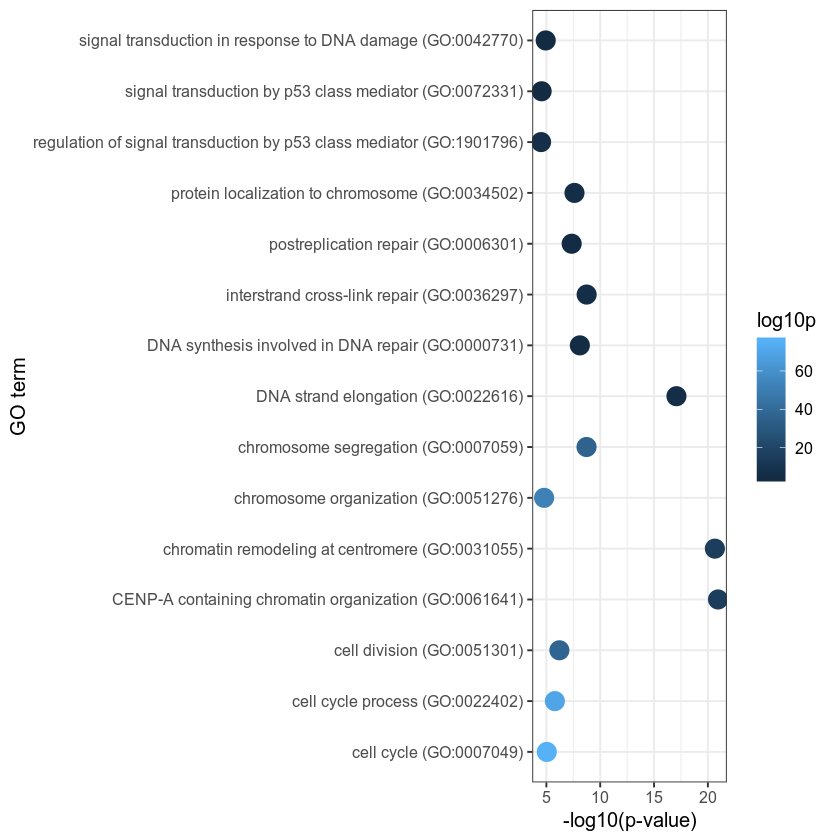

In [10]:
d_plot <- ggplot(fig1A, aes_string(x="term", 
                                   y="fold_enrichment", 
                                   colour="log10p")) +
          geom_point(size=5) +
          coord_flip() +
          theme_bw(base_size=12) +
          ylab('-log10(p-value)') +
          xlab('GO term')
d_plot
ggsave('../Figures/Figure1/Figure1A_dot.pdf')

In [11]:
fig1A <- fread('../data/data_for_figures//Figure1A_transcription_downregulated_geneontology.tsv')
colnames(fig1A) <- c("term", "fold_enrichment", "upload_1 (FDR)")
fig1A$log10p = -log10(fig1A[, 'upload_1 (FDR)'])

rownames.fig1A <- fig1A$term

In [12]:
fig1A <- as.matrix(fig1A[, c("fold_enrichment", "upload_1 (FDR)", "log10p")])
rownames(fig1A) <- rownames.fig1A

In [13]:
as.matrix(fig1A)

,fold_enrichment,upload_1 (FDR),log10p
CENP-A containing chromatin organization (GO:0061641),20.94,1.84e-15,14.735182
chromatin remodeling at centromere (GO:0031055),20.65,4.51e-16,15.345823
chromosome organization (GO:0051276),4.79,1.28e-52,51.892790
DNA strand elongation (GO:0022616),17.08,6.50e-07,6.187087
interstrand cross-link repair (GO:0036297),8.74,7.12e-07,6.147520
signal transduction in response to DNA damage (GO:0042770),4.94,4.93e-05,4.307153
DNA synthesis involved in DNA repair (GO:0000731),8.11,4.61e-06,5.336299
postreplication repair (GO:0006301),7.35,3.34e-05,4.476254
chromosome segregation (GO:0007059),8.73,1.34e-36,35.872895
cell division (GO:0051301),6.21,3.69e-38,37.432974


In [14]:
fig1B <- fread('../data/data_for_figures//Figure1B_transcription_downregulated_geneontology.tsv')
colnames(fig1B) <- c("term", "fold_enrichment", "upload_1 (FDR)")
fig1B$log10p = -log10(fig1B[, 'upload_1 (FDR)'])
fig1B

pdf("../Figures/Figure1/Figure1B.pdf", family="Arial")
drawHeatmap(fig1B)
dev.off()

term,fold_enrichment,upload_1 (FDR),log10p
<chr>,<dbl>,<dbl>,<dbl>
U4 snRNA 3'-end processing (GO:0034475),20.28,1.25e-03,2.903090
snoRNA processing (GO:0043144),12.48,6.12e-03,2.213249
nuclear RNA surveillance (GO:0071027),11.59,7.77e-03,2.109579
rRNA processing (GO:0006364),3.64,3.06e-05,4.514279
RNA 3'-end processing (GO:0031123),3.63,2.02e-03,2.694649
ribonucleoprotein complex localization (GO:0071166),3.52,4.41e-03,2.355561
RNA export from nucleus (GO:0006405),3.47,5.06e-03,2.295849
ribosome biogenesis (GO:0042254),3.37,3.06e-06,5.514279
RNA localization (GO:0006403),3.11,6.77e-04,3.169411


ERROR: Error in pdf("../Figures/Figure1/Figure1B.pdf", family = "Arial"): unknown family 'Arial'


In [ ]:
fig3A <- fread('../data/data_for_figures//Figure3A_matrisome_geneontology.tsv')
colnames(fig3A) <- c("term",  "fold_enrichment", "upload_1 (FDR)")
fig3A$log10p = -log10(fig3A[, 'upload_1 (FDR)'])
fig3A

pdf("../Figures/Figure3/Figure3A.pdf", family="ArialMT")
drawHeatmap(fig3A)
dev.off()

In [ ]:
d_plot <- ggplot(fig3A, aes_string(x="term", 
                                   y="fold_enrichment", 
                                   colour="log10p")) +
          geom_point(size=5) +
          coord_flip() +
          theme_bw(base_size=12) +
          ylab('-log10(p-value)') +
          xlab('GO term')
d_plot
ggsave('../Figures/Figure3/Figure3A_dot.pdf')

In [ ]:
p_plot <- ggplot(fig3A,  aes_string(x=paste0("reorder(","term",", fold_enrichment)"), y="fold_enrichment", fill="log10p")) +
geom_col() +
coord_flip() +
theme_bw(base_size=12) +
ylab('-log10(p-value)')+
xlab('GO term')
p_plot
ggsave('../Figures/Figure3/Figure3A_bar.pdf', height = 7 , width = 10.9)

In [ ]:
fig4A <- fread('../data/data_for_figures//Figure4A_splicing_geneontology.tsv')
colnames(fig4A) <- c("term", 'reflist', "fold_enrichment", "upload_1 (FDR)")
fig4A$log10p = -log10(fig4A[, 'upload_1 (FDR)'])
fig4A

In [ ]:
pdf("../Figures/Figure4/Figure4A.pdf", family="ArialMT")
drawHeatmap(fig4A)
dev.off()

In [ ]:
fig5A <- fread('../data/data_for_figures/Figure5A_TE_geneontology.tsv')
colnames(fig5A) <- c("term",  "fold_enrichment", "upload_1 (FDR)")
fig5A$log10p = -log10(fig5A[, 'upload_1 (FDR)'])
fig5A

In [ ]:
drawHeatmap <- function(figX){
    rownames.figX <- figX$term
    figX<- as.matrix(figX[, c("fold_enrichment", "upload_1 (FDR)", "log10p")])
    rownames(figX) <- rownames.figX
    
    df <- data.frame(list(log10pvalue=figX[, c("log10p")], 
                          enrichment=figX[, c("fold_enrichment")]))
    
    ha <- Heatmap(figX, 
                  cluster_rows=F, 
                  cluster_columns=F, 
                  show_heatmap_legend = F, 
                  row_names_max_width = unit(20, "cm"),
                  row_names_side = "left",
                  rect_gp =  gpar(type = "none"),  
                  width = unit(0, "cm"),
                  height = unit(12, "cm"),
                  row_title_gp = gpar(fontsize = 11, font=2),
                  row_names_gp = gpar(fontsize = 11, font=2),
                  column_labels=c("", "", ""))

    ht <- rowAnnotation(df=df, 
                        gp = gpar(col = "black", lwd = 1, fontsize=11, font=2),
                        col=list(log10pvalue=log10p_fun, enrichment=enrichment_fun))
    return (ha+ht)
    
}

In [ ]:
pdf("../Figures/Figure5/Figure5A.pdf", family="ArialMT")
drawHeatmap(fig5A)
dev.off()
